![DATE Header.jpg](attachment:358b734d-ea3a-4aaf-a4f3-f8b4818840f7.jpg)

# Instructor: PRASHANTH KANNADAGULI

## DEEP LEARNING Internship: Mini-Project

## Prediction of Weather Parameters using Recurrent Neural Networks

## Part 1: Data Loading, Exploration, and EDA

#### Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Loading the Dataset: Load the weather.csv dataset into a pandas DataFrame. Display the first 5 rows to verify successful loading.

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('weather.csv')
print("First 5 rows:")
print(df.head())

Saving weather.csv to weather (1).csv
First 5 rows:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


#### Initial Inspection: Display the last 5 rows of the DataFrame and print the total number of rows and columns to understand the dataset's size and structure.

In [3]:
print("\nLast 5 rows:")
print(df.tail())
print(f"\nTotal rows: {df.shape[0]}, Total columns: {df.shape[1]}")


Last 5 rows:
            date  precipitation  temp_max  temp_min  wind weather
1456  2015-12-27            8.6       4.4       1.7   2.9    rain
1457  2015-12-28            1.5       5.0       1.7   1.3    rain
1458  2015-12-29            0.0       7.2       0.6   2.6     fog
1459  2015-12-30            0.0       5.6      -1.0   3.4     sun
1460  2015-12-31            0.0       5.6      -2.1   3.5     sun

Total rows: 1461, Total columns: 6


#### Column Names and Data Types: Print the names of all columns in the DataFrame. Then, check and display the data type of each column. Are the data types appropriate for numerical analysis and time series processing?

In [4]:
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Column Names: ['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

Data Types:
 date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


#### Check Dataset Shape: Print the number of rows and columns in the DataFrame.

In [5]:
print("\nDataset Shape:", df.shape)


Dataset Shape: (1461, 6)


#### Get Data Information: Display concise information about the DataFrame, including the index dtype, column dtypes, and non-null values.

In [6]:
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


#### Check for Missing Values (Count): Check if there are any missing values in each column and display the count of missing values per column.

In [7]:
print("\nMissing Values Count:\n", df.isnull().sum())


Missing Values Count:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


#### Check for Missing Values (Percentage): Calculate and display the percentage of missing values for each column.

In [ ]:
print("\nMissing Values Percentage:\n", (df.isnull().mean() * 100).round(2))


Missing Values Percentage:
 date             0.0
precipitation    0.0
temp_max         0.0
temp_min         0.0
wind             0.0
weather          0.0
dtype: float64


#### Handle Missing Values (If Any):
Based on the previous checks, if missing values were found, write comments explaining how you would choose to handle them in this time series context (e.g., imputation, dropping).

In [ ]:
# df.fillna(method='ffill', inplace=True)

#### Get Descriptive Statistics:
Generate descriptive statistics for the numerical columns (precipitation, temp_max, temp_min, wind).

In [ ]:
desc_stats = df.describe()
print("\nDescriptive Statistics:\n", desc_stats)


Descriptive Statistics:
        precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


#### Extract Specific Statistics:
From the descriptive statistics, identify and print the minimum, maximum, and average values for temp_max and temp_min.

In [ ]:
print("\nTemp Max - Min:", desc_stats.loc['min', 'temp_max'])
print("Temp Max - Max:", desc_stats.loc['max', 'temp_max'])
print("Temp Max - Mean:", desc_stats.loc['mean', 'temp_max'])
print("\nTemp Min - Min:", desc_stats.loc['min', 'temp_min'])
print("Temp Min - Max:", desc_stats.loc['max', 'temp_min'])
print("Temp Min - Mean:", desc_stats.loc['mean', 'temp_min'])


Temp Max - Min: -1.6
Temp Max - Max: 35.6
Temp Max - Mean: 16.43908281998631

Temp Min - Min: -7.1
Temp Min - Max: 18.3
Temp Min - Mean: 8.234770704996578


#### Calculate Variance and Standard Deviation:
Calculate and print the variance and standard deviation for all numerical columns.

In [ ]:
print("\nVariance:\n", df.var(numeric_only=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))


Variance:
 precipitation    44.624996
temp_max         54.018944
temp_min         25.230571
wind              2.067341
dtype: float64

Standard Deviation:
 precipitation    6.680194
temp_max         7.349758
temp_min         5.023004
wind             1.437825
dtype: float64


#### Visualize Distributions (Histograms):
Plot a histogram for each of the four numerical columns (precipitation, temp_max, temp_min, wind) to visualize their distribution. Use a suitable number of bins.

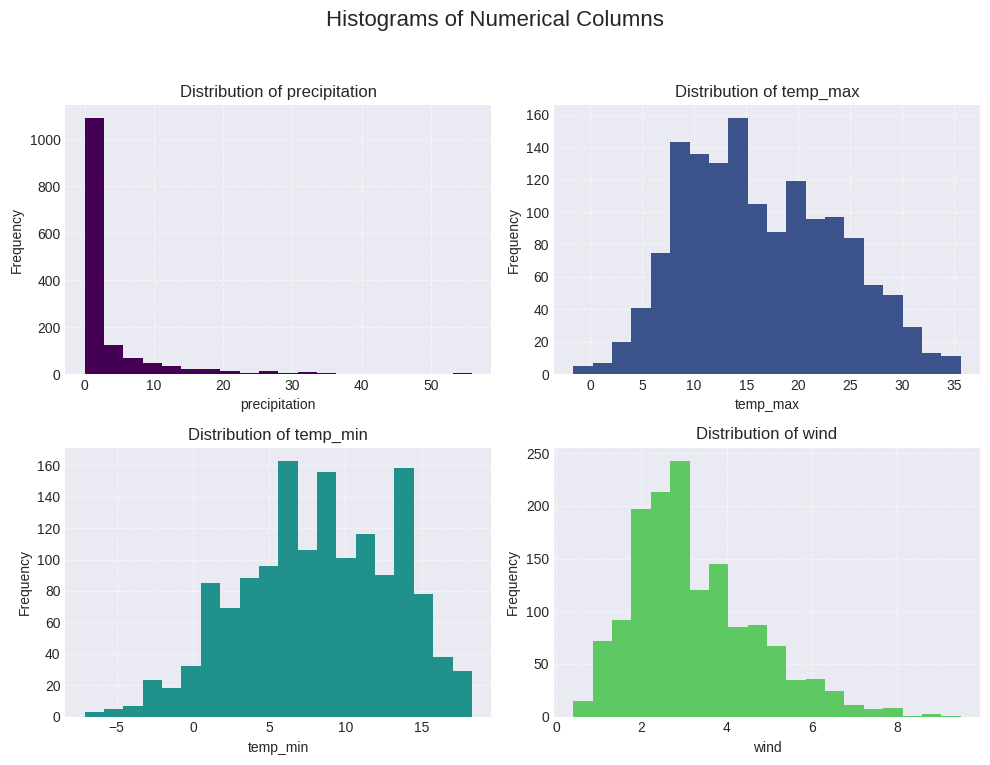

In [8]:
# Set a more attractive plot style (e.g., 'seaborn-v0_8-darkgrid' or 'ggplot')
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
bins = 20

axes = axes.flatten() # Flatten the 2x2 array of axes to easily iterate

for i, col in enumerate(features):
    axes[i].hist(df[col], bins=bins, color=plt.cm.viridis(i/len(features))) # Use different colors
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, linestyle='--', alpha=0.6) # Add grid

plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

#### Visualize Time Series Trends:
Plot the values of each of the four features over time. Assume the row index represents the time step. Use different subplots for each feature for clarity.

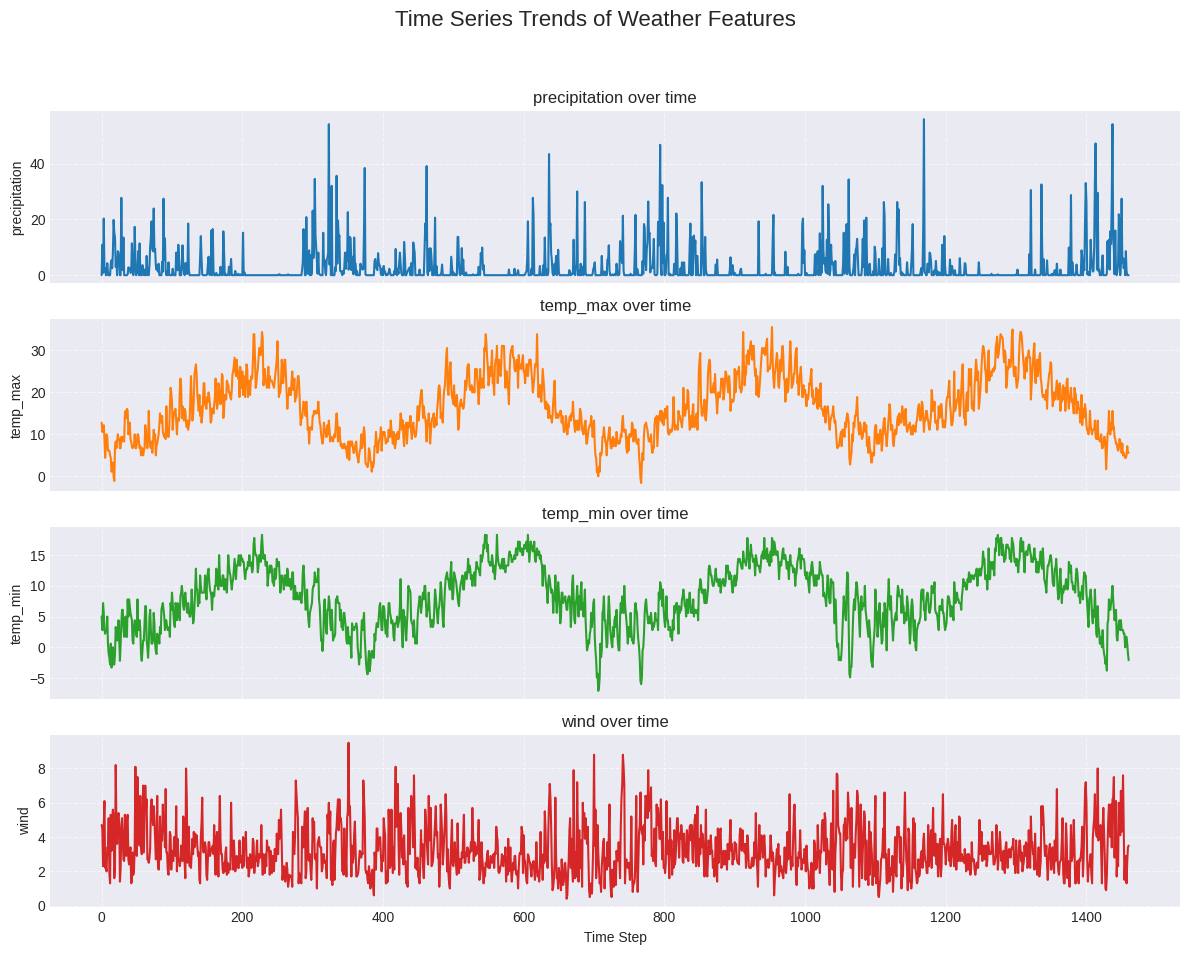

In [9]:
plt.style.use('seaborn-v0_8-darkgrid') # Use a different style

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i, col in enumerate(features):
    axes[i].plot(df[col], color=plt.cm.tab10(i)) # Use different colors for each line
    axes[i].set_title(f"{col} over time")
    axes[i].set_ylabel(col) # Add y-axis labels
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.suptitle("Time Series Trends of Weather Features", fontsize=16) # Add a main title
plt.xlabel("Time Step") # Add a common x-axis label
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Visualize Potential Outliers (Box Plots):
Create box plots for each numerical column to visualize potential outliers.

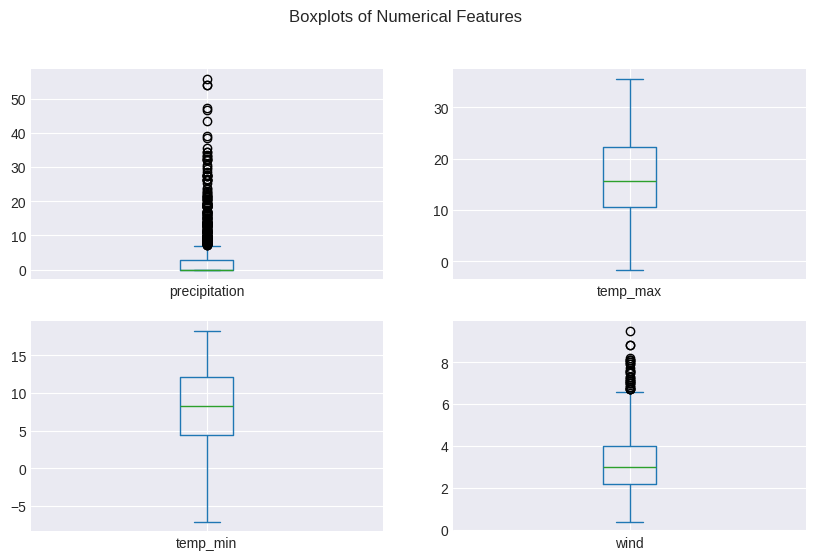

In [10]:
df[features].plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 6))
plt.suptitle("Boxplots of Numerical Features")
plt.show()

#### Calculate Feature Correlation:
Calculate the pairwise correlation of columns using the Pearson correlation coefficient.

In [11]:
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


#### Visualize Feature Correlation (Heatmap):
Visualize the correlation matrix using a heatmap. Add annotations to show the correlation values.

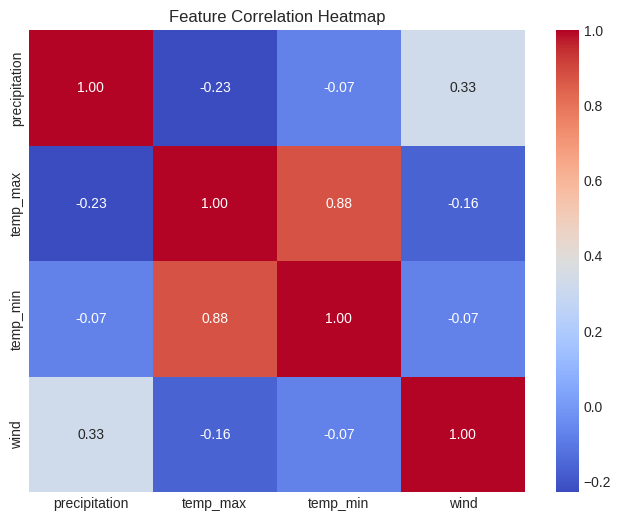

In [12]:
plt.style.use('seaborn-v0_8-darkgrid') # Use a different style
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Part 2: Single-Step Future Prediction Models

Objective: Build, train, and evaluate multiple RNN models using Keras to predict a single value one time step into the future, using a sequence of past observations from all four weather features.

#### General Instructions:

Assume a lookback_window of 10 time steps for creating sequences unless otherwise specified. This means each input sample X will be a sequence of 10 past data points (each point having 4 features), and the corresponding output y will be the value(s) at the 11th time step.

Use appropriate scaling (e.g., MinMaxScaler or StandardScaler) on the data before creating sequences. Remember to scale your target variable(s) as well if they are numerical.

Split your data into training and testing sets while preserving the time order. A common split is 80% for training and 20% for testing. Ensure your splitting method does not shuffle the data.

Use Keras with a TensorFlow backend to build your RNN models. You can experiment with SimpleRNN, GRU, or LSTM layers.

### Model 1: Predict single precipitation value in future

#### Data Preparation for Precipitation Prediction:

Prepare the data for training an RNN model to predict the single future precipitation value.

Scale the relevant features (precipitation, temp_max, temp_min, wind) using a suitable scaler.

Create input sequences (X) of length lookback_window (10) using the scaled features.

Create the corresponding output array (y) containing the single scaled future precipitation value for each sequence.

Split the sequence data (X, y) into training and testing sets chronologically.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
test_ratio = 0.2
# ---------------------------

# Load data
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window):
    X.append(scaled_data[i:i + lookback_window])  # past 10 time steps
    y.append(scaled_data[i + lookback_window, 0])  # precipitation column index 0

X = np.array(X)
y = np.array(y)

# ---------------------------
# Train-test split (chronological)
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#### Build RNN Model for Precipitation:
Design and implement a Keras Sequential model using RNN layers (e.g., LSTM or GRU) specifically for predicting a single future precipitation value.

Define the input shape based on your sequences (lookback_window, number of features).

Add one or more RNN layers.

Add a Dense output layer with 1 unit and an appropriate activation function (or none, for regression).

Print the model summary.

In [14]:
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features))))
model.add(Dense(1))  # regression output

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 1:
Compile the precipitation prediction model.

Choose a suitable optimizer (e.g., 'adam').

Choose an appropriate loss function for regression (e.g., 'mean_squared_error').

Add relevant metrics (e.g., 'mean_absolute_error'). Train the model using your prepared training data for a reasonable number of epochs and batch size.

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0708 - val_loss: 0.0149 - val_mean_absolute_error: 0.0690
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - mean_absolute_error: 0.0652 - val_loss: 0.0146 - val_mean_absolute_error: 0.0592
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - mean_absolute_error: 0.0617 - val_loss: 0.0142 - val_mean_absolute_error: 0.0613
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0139 - mean_absolute_error: 0.0677 - val_loss: 0.0145 - val_mean_absolute_error: 0.0763
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0652 - val_loss: 0.0141 - val_mean_absolute_error: 0.0685
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0694 - val_loss: 0.0143 - val_mean_absolute_error: 0.0578
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0111 - mean_absolute_error: 0.0611 - val_loss: 0.01

#### Evaluate Model 1 Performance:
Evaluate the trained precipitation prediction model on the test dataset.

Report the loss (MSE) and the MAE on the test set.

Calculate and report the Root Mean Squared Error (RMSE) on the test set.

In [16]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
rmse = np.sqrt(loss)
print(f"Test MSE: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Test MSE: 0.0140
Test MAE: 0.0725
Test RMSE: 0.1184


#### Predict and Visualize Model 1 Results:
Use the trained model to make predictions on the test set input sequences.

Inverse scale the predictions and the actual test precipitation values to return them to their original scale.

Plot the actual future precipitation values from the test set against the model's predicted future precipitation values over time (using the time index corresponding to the prediction point).

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


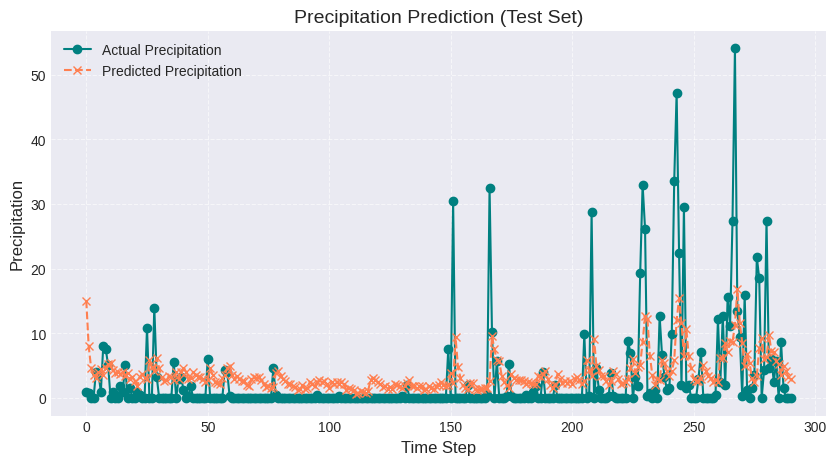

In [19]:
y_pred_scaled = model.predict(X_test)

# Inverse transform (only precipitation column)
# Prepare array for inverse scaling
y_test_full = np.zeros((len(y_test), len(features)))
y_test_full[:, 0] = y_test
y_pred_full = np.zeros((len(y_pred_scaled), len(features)))
y_pred_full[:, 0] = y_pred_scaled.flatten()

y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]

# ---------------------------
# Plot Actual vs Predicted
# ---------------------------
plt.style.use('seaborn-v0_8-darkgrid') # Use a different style
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual Precipitation', marker='o', color='teal', linestyle='-') # Changed color and linestyle
plt.plot(y_pred_inv, label='Predicted Precipitation', marker='x', color='coral', linestyle='--') # Changed color, marker, and linestyle
plt.title('Precipitation Prediction (Test Set)', fontsize=14) # Increased title font size
plt.xlabel('Time Step', fontsize=12) # Increased xlabel font size
plt.ylabel('Precipitation', fontsize=12) # Increased ylabel font size
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Added grid
plt.show()

### Model 2: Predict single temp_max value in future

#### Data Preparation for temp_max Prediction:
Prepare the data similarly to Model 1, but create the output array (y) containing the single scaled future temp_max value for each sequence.

#### Build RNN Model for temp_max:
Design and implement a Keras Sequential model using RNN layers for predicting a single future temp_max value. The model architecture can be similar to Model 1, but ensure it's configured correctly for this specific output. Print the model summary.

#### Compile and Train Model 2:
Compile the temp_max prediction model using appropriate optimizer, loss function (MSE), and metrics (MAE). Train the model on the prepared training data.

#### Evaluate Model 2 Performance:
Evaluate the trained temp_max prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 2 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test temp_max values. Plot the actual vs. predicted future temp_max values over time.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1206 - mean_absolute_error: 0.2660 - val_loss: 0.0138 - val_mean_absolute_error: 0.0927
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - mean_absolute_error: 0.0822 - val_loss: 0.0102 - val_mean_absolute_error: 0.0821
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0101 - mean_absolute_error: 0.0782 - val_loss: 0.0097 - val_mean_absolute_error: 0.0792
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0100 - mean_absolute_error: 0.0795 - val_loss: 0.0104 - val_mean_absolute_error: 0.0796
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0095 - mean_absolute_error: 0.0751 - val_loss: 0.0092 - val_mean_absolute_error: 0.0776
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0096 - mean_absolute_error: 0.0760 - val_loss: 0.0091 - val_mean_absolute_error: 0.0759
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0756 - val_loss: 0

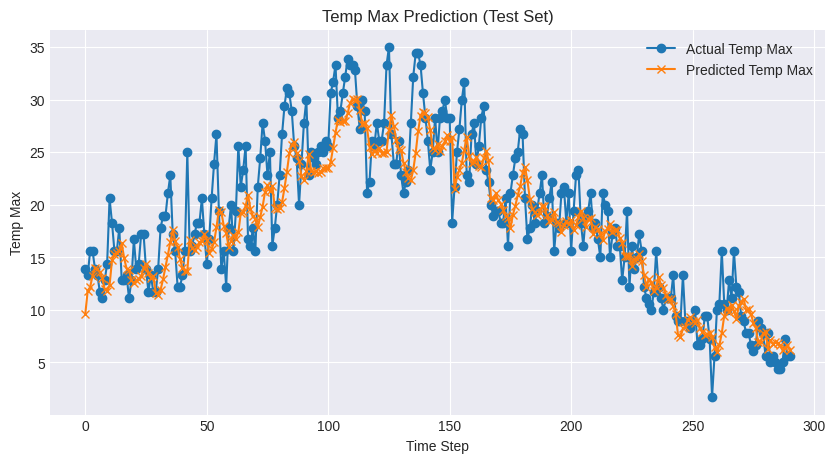

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
test_ratio = 0.2
target_col_index = 1  # temp_max column in features list
# ---------------------------

# Load dataset
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences for temp_max prediction
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window):
    X.append(scaled_data[i:i + lookback_window])  # past steps
    y.append(scaled_data[i + lookback_window, target_col_index])  # future temp_max

X = np.array(X)
y = np.array(y)

# ---------------------------
# Chronological train-test split
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ---------------------------
# Build LSTM model
# ---------------------------
model2 = Sequential()
model2.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features))))
model2.add(Dense(1))  # regression output

model2.summary()

# ---------------------------
# Compile and train
# ---------------------------
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# ---------------------------
# Evaluate
# ---------------------------
loss2, mae2 = model2.evaluate(X_test, y_test, verbose=0)
rmse2 = np.sqrt(loss2)
print(f"Test MSE: {loss2:.4f}")
print(f"Test MAE: {mae2:.4f}")
print(f"Test RMSE: {rmse2:.4f}")

# ---------------------------
# Predict
# ---------------------------
y_pred_scaled2 = model2.predict(X_test)

# Inverse scale predictions and actuals
y_test_full2 = np.zeros((len(y_test), len(features)))
y_test_full2[:, target_col_index] = y_test

y_pred_full2 = np.zeros((len(y_pred_scaled2), len(features)))
y_pred_full2[:, target_col_index] = y_pred_scaled2.flatten()

y_test_inv2 = scaler.inverse_transform(y_test_full2)[:, target_col_index]
y_pred_inv2 = scaler.inverse_transform(y_pred_full2)[:, target_col_index]

# ---------------------------
# Plot actual vs predicted
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv2, label='Actual Temp Max', marker='o')
plt.plot(y_pred_inv2, label='Predicted Temp Max', marker='x')
plt.title('Temp Max Prediction (Test Set)')
plt.xlabel('Time Step')
plt.ylabel('Temp Max')
plt.legend()
plt.show()


### Model 3: Predict single temp_min value in future

#### Data Preparation for temp_min Prediction:
Prepare the data, creating the output array (y) containing the single scaled future temp_min value for each sequence.

#### Build RNN Model for temp_min:
Design and implement a Keras Sequential model using RNN layers for predicting a single future temp_min value. Print the model summary.

#### Compile and Train Model 3:
Compile and train the temp_min prediction model using appropriate settings (optimizer, MSE loss, MAE metric).

#### Evaluate Model 3 Performance:
Evaluate the trained temp_min prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 3 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test temp_min values. Plot the actual vs. predicted future temp_min values over time.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1223 - mean_absolute_error: 0.2732 - val_loss: 0.0090 - val_mean_absolute_error: 0.0787
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - mean_absolute_error: 0.0801 - val_loss: 0.0069 - val_mean_absolute_error: 0.0664
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0100 - mean_absolute_error: 0.0763 - val_loss: 0.0066 - val_mean_absolute_error: 0.0650
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - mean_absolute_error: 0.0788 - val_loss: 0.0070 - val_mean_absolute_error: 0.0672
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097 - mean_absolute_error: 0.0751 - val_loss: 0.0063 - val_mean_absolute_error: 0.0637
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0094 - mean_absolute_error: 0.0755 - val_loss: 0.0064 - val_mean_absolute_error: 0.0644
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0094 - mean_absolute_error: 0.0746 - val_loss: 0.

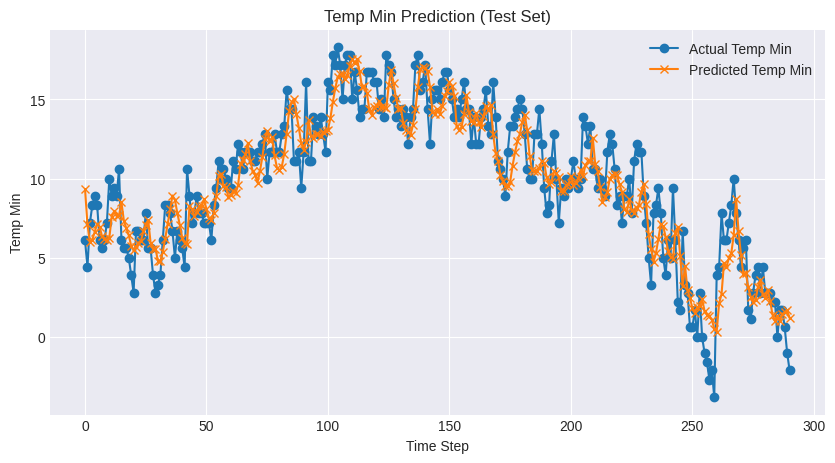

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
test_ratio = 0.2
target_col_index = 2  # temp_min column in features list
# ---------------------------

# Load dataset
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences for temp_min prediction
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window):
    X.append(scaled_data[i:i + lookback_window])  # past steps
    y.append(scaled_data[i + lookback_window, target_col_index])  # future temp_min

X = np.array(X)
y = np.array(y)

# ---------------------------
# Chronological train-test split
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ---------------------------
# Build LSTM model
# ---------------------------
model3 = Sequential()
model3.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features))))
model3.add(Dense(1))  # regression output

model3.summary()

# ---------------------------
# Compile and train
# ---------------------------
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# ---------------------------
# Evaluate
# ---------------------------
loss3, mae3 = model3.evaluate(X_test, y_test, verbose=0)
rmse3 = np.sqrt(loss3)
print(f"Test MSE: {loss3:.4f}")
print(f"Test MAE: {mae3:.4f}")
print(f"Test RMSE: {rmse3:.4f}")

# ---------------------------
# Predict
# ---------------------------
y_pred_scaled3 = model3.predict(X_test)

# Inverse scale predictions and actuals
y_test_full3 = np.zeros((len(y_test), len(features)))
y_test_full3[:, target_col_index] = y_test

y_pred_full3 = np.zeros((len(y_pred_scaled3), len(features)))
y_pred_full3[:, target_col_index] = y_pred_scaled3.flatten()

y_test_inv3 = scaler.inverse_transform(y_test_full3)[:, target_col_index]
y_pred_inv3 = scaler.inverse_transform(y_pred_full3)[:, target_col_index]

# ---------------------------
# Plot actual vs predicted
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv3, label='Actual Temp Min', marker='o')
plt.plot(y_pred_inv3, label='Predicted Temp Min', marker='x')
plt.title('Temp Min Prediction (Test Set)')
plt.xlabel('Time Step')
plt.ylabel('Temp Min')
plt.legend()
plt.show()


### Model 4: Predict single wind value in future

#### Data Preparation for Wind Prediction:
Prepare the data, creating the output array (y) containing the single scaled future wind value for each sequence.

#### Build RNN Model for Wind:
Design and implement a Keras Sequential model using RNN layers for predicting a single future wind value. Print the model summary.

#### Compile and Train Model 4:
Compile and train the wind prediction model using appropriate settings (optimizer, MSE loss, MAE metric).

#### Evaluate Model 4 Performance:
Evaluate the trained wind prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 4 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test wind values. Plot the actual vs. predicted future wind values over time.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0335 - mean_absolute_error: 0.1389 - val_loss: 0.0188 - val_mean_absolute_error: 0.1077
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0245 - mean_absolute_error: 0.1220 - val_loss: 0.0176 - val_mean_absolute_error: 0.1022
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0233 - mean_absolute_error: 0.1168 - val_loss: 0.0172 - val_mean_absolute_error: 0.1032
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0227 - mean_absolute_error: 0.1180 - val_loss: 0.0170 - val_mean_absolute_error: 0.1031
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0222 - mean_absolute_error: 0.1186 - val_loss: 0.0169 - val_mean_absolute_error: 0.1030
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0219 - mean_absolute_error: 0.1138 - val_loss: 0.0166 - val_mean_absolute_error: 0.1008
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0207 - mean_absolute_error: 0.1124 - val_loss: 0.

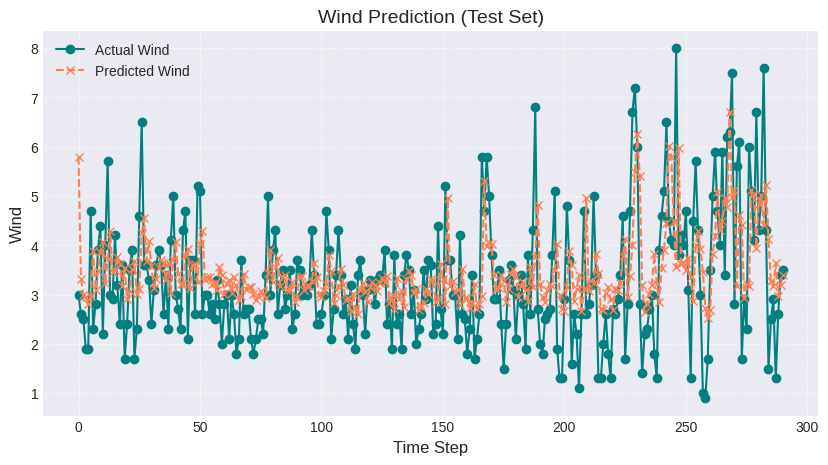

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
test_ratio = 0.2
target_col_index = 3  # wind column in features list
# ---------------------------

# Load dataset
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences for wind prediction
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window):
    X.append(scaled_data[i:i + lookback_window])  # past steps
    y.append(scaled_data[i + lookback_window, target_col_index])  # future wind

X = np.array(X)
y = np.array(y)

# ---------------------------
# Chronological train-test split
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ---------------------------
# Build LSTM model
# ---------------------------
model4 = Sequential()
model4.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features))))
model4.add(Dense(1))  # regression output

model4.summary()

# ---------------------------
# Compile and train
# ---------------------------
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history4 = model4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# ---------------------------
# Evaluate
# ---------------------------
loss4, mae4 = model4.evaluate(X_test, y_test, verbose=0)
rmse4 = np.sqrt(loss4)
print(f"Test MSE: {loss4:.4f}")
print(f"Test MAE: {mae4:.4f}")
print(f"Test RMSE: {rmse4:.4f}")

# ---------------------------
# Predict
# ---------------------------
y_pred_scaled4 = model4.predict(X_test)

# Inverse scale predictions and actuals
y_test_full4 = np.zeros((len(y_test), len(features)))
y_test_full4[:, target_col_index] = y_test

y_pred_full4 = np.zeros((len(y_pred_scaled4), len(features)))
y_pred_full4[:, target_col_index] = y_pred_scaled4.flatten()

y_test_inv4 = scaler.inverse_transform(y_test_full4)[:, target_col_index]
y_pred_inv4 = scaler.inverse_transform(y_pred_full4)[:, target_col_index]

# ---------------------------
# Plot actual vs predicted
# ---------------------------
plt.style.use('seaborn-v0_8-darkgrid') # Use a different style
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv4, label='Actual Wind', marker='o', color='teal', linestyle='-')  # Added styling
plt.plot(y_pred_inv4, label='Predicted Wind', marker='x', color='coral', linestyle='--') # Added styling
plt.title('Wind Prediction (Test Set)', fontsize=14) # Added styling
plt.xlabel('Time Step', fontsize=12) # Added styling
plt.ylabel('Wind', fontsize=12) # Added styling
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Added styling
plt.show()

### Model 5: Predict single future values of all 4 parameters

#### Data Preparation for All 4 Parameters Prediction:
Prepare the data for a multi-output RNN model. Scale the features. Create input sequences (X) of length lookback_window (10) using the scaled features. Create the corresponding output array (y) containing the single scaled future values for all four features (precipitation, temp_max, temp_min, wind) for each sequence. Split the sequence data (X, y) into training and testing sets.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
test_ratio = 0.2
# ---------------------------

# Load dataset
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences for multi-output prediction
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window):
    X.append(scaled_data[i:i + lookback_window])  # past 10 timesteps
    y.append(scaled_data[i + lookback_window])    # next timestep (all 4 features)

X = np.array(X)
y = np.array(y)  # shape: (samples, 4)

# ---------------------------
# Chronological train-test split
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


#### Build RNN Model for All 4 Parameters:
Design and implement a Keras Sequential model using RNN layers for predicting the single future values of all four parameters simultaneously.

Define the input shape.
Add one or more RNN layers.
Add a Dense output layer with 4 units (one for each predicted feature). Print the model summary.

In [25]:
model5 = Sequential()
model5.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features))))
model5.add(Dense(len(features)))  # 4 outputs for 4 features

model5.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,924 (70.02 KB)

 Trainable params: 17,924 (70.02 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 5:
Compile the multi-output prediction model using appropriate optimizer, loss function (e.g., 'mean_squared_error'), and metrics (e.g., 'mean_absolute_error'). Train the model on the prepared training data.

In [26]:
model5.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history5 = model5.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1388 - mean_absolute_error: 0.2706 - val_loss: 0.0159 - val_mean_absolute_error: 0.0918
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0165 - mean_absolute_error: 0.0918 - val_loss: 0.0127 - val_mean_absolute_error: 0.0779
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0144 - mean_absolute_error: 0.0854 - val_loss: 0.0127 - val_mean_absolute_error: 0.0766
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - mean_absolute_error: 0.0878 - val_loss: 0.0125 - val_mean_absolute_error: 0.0789
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0857 - val_loss: 0.0121 - val_mean_absolute_error: 0.0767
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0870 - val_loss: 0.0120 - val_mean_absolute_error: 0.0751
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0850 - val_loss: 0.01

#### Evaluate Model 5 Performance:
Evaluate the trained multi-output prediction model on the test dataset. Report the overall MSE and MAE. Discuss how you might evaluate the performance for each individual output feature if needed.

In [28]:
loss5, mae5 = model5.evaluate(X_test, y_test, verbose=0)
rmse5 = np.sqrt(loss5)
print(f"Test MSE: {loss5:.4f}")
print(f"Test MAE: {mae5:.4f}")
print(f"Test RMSE: {rmse5:.4f}")

# per-feature performance:
y_pred_scaled5 = model5.predict(X_test)
for i, col in enumerate(features):
    mse_feat = mean_squared_error(y_test[:, i], y_pred_scaled5[:, i])
    rmse_feat = np.sqrt(mse_feat)
    mae_feat = mean_absolute_error(y_test[:, i], y_pred_scaled5[:, i])
    print(f"{col}: MSE={mse_feat:.4f}, RMSE={rmse_feat:.4f}, MAE={mae_feat:.4f}")


Test MSE: 0.0113
Test MAE: 0.0756
Test RMSE: 0.1065
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
precipitation: MSE=0.0143, RMSE=0.1197, MAE=0.0725
temp_max: MSE=0.0083, RMSE=0.0913, MAE=0.0723
temp_min: MSE=0.0053, RMSE=0.0726, MAE=0.0583
wind: MSE=0.0174, RMSE=0.1320, MAE=0.0994


#### Predict and Visualize Model 5 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and the actual test target values (which are vectors of 4). Visualize the results by plotting the actual vs. predicted values over time for each of the four features, possibly using subplots or different colored lines on the same plot.

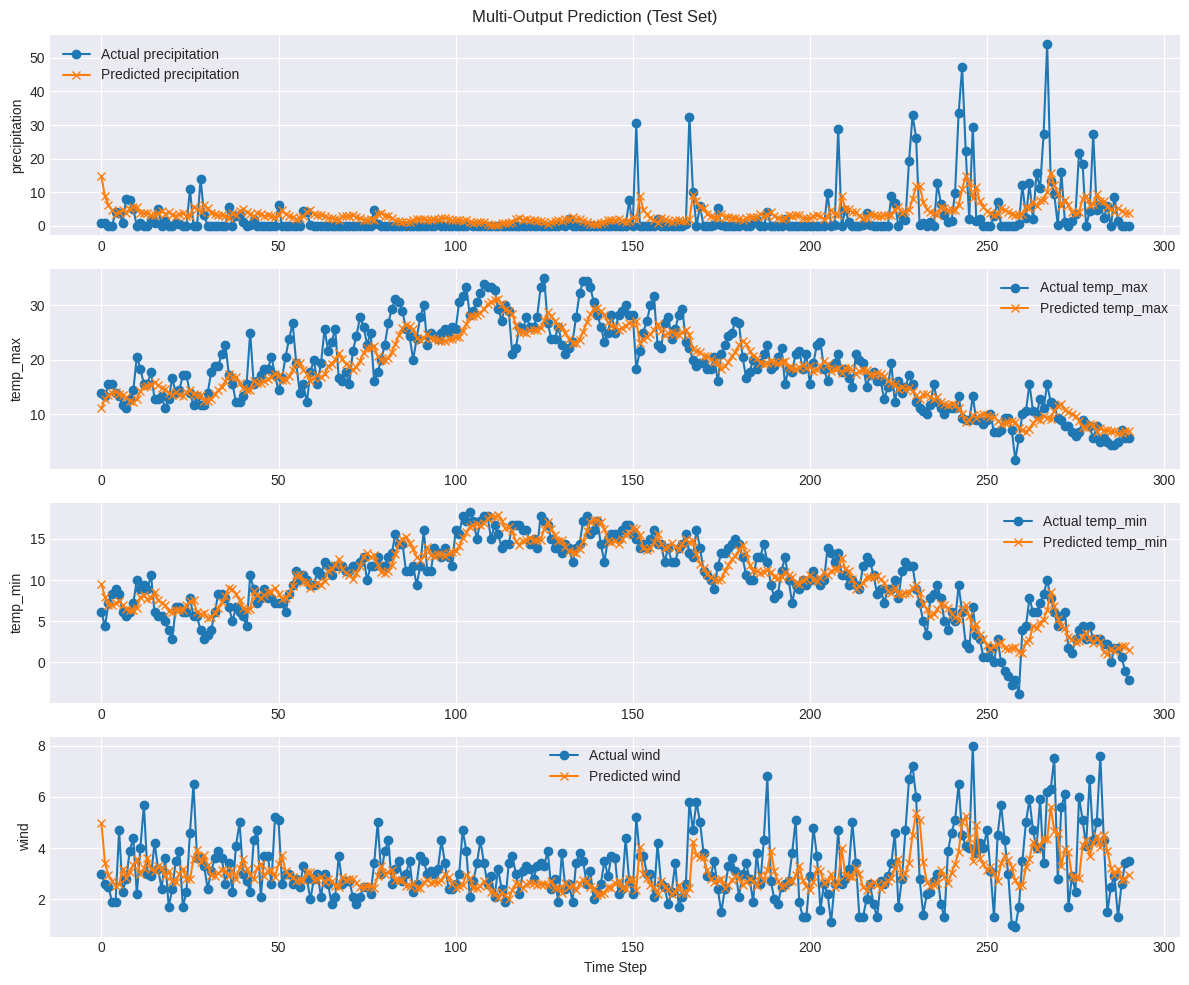

In [29]:
y_test_inv5 = scaler.inverse_transform(y_test)
y_pred_inv5 = scaler.inverse_transform(y_pred_scaled5)

plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(4, 1, i + 1)
    plt.plot(y_test_inv5[:, i], label=f'Actual {col}', marker='o')
    plt.plot(y_pred_inv5[:, i], label=f'Predicted {col}', marker='x')
    plt.ylabel(col)
    plt.legend()
plt.suptitle("Multi-Output Prediction (Test Set)")
plt.xlabel("Time Step")
plt.tight_layout()
plt.show()

### Part 3: Multi-Step Future Prediction Models

Objective: Build, train, and evaluate multiple RNN models using Keras to predict 5 time steps into the future, using a sequence of 10 past observations from all four weather features.

#### General Instructions:

Use a lookback_window of 10 time steps for input sequences (X).
Use a prediction_horizon of 5 time steps for the output sequences (y).
Continue using appropriate scaling on the data before creating sequences.
Split your data into training and testing sets chronologically (e.g., 80/20 split).
Build Keras RNN models, considering how the output layer structure needs to handle predicting a sequence. A TimeDistributed layer is commonly used for this.

### Model 6: Predict multiple (prediction_horizon=5) precipitation values in future

### Data Preparation for Multi-Step Precipitation Prediction:
Prepare the data for training an RNN model to predict the next 5 precipitation values.

Scale the relevant features (precipitation, temp_max, temp_min, wind).

Create input sequences (X) of length 10 using the scaled features.

Create the corresponding output sequences (y) containing the scaled future precipitation values for the next 5 time steps for each input sequence.

Split the sequence data (X, y) into training and testing sets chronologically. Ensure the shapes of your training and testing X and y are correct (e.g., (num_samples, lookback_window, num_features) for X and (num_samples, prediction_horizon, 1) for y).

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
prediction_horizon = 5
test_ratio = 0.2
target_col_index = 0  # precipitation column in features list
# ---------------------------

# Load dataset
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences for multi-step precipitation prediction
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X.append(scaled_data[i:i + lookback_window])
    future_precip = scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_col_index]
    y.append(future_precip.reshape(-1, 1))  # shape: (prediction_horizon, 1)

X = np.array(X)
y = np.array(y)  # shape: (samples, prediction_horizon, 1)

# ---------------------------
# Chronological train-test split
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)




X_train shape: (1157, 10, 4)
y_train shape: (1157, 5, 1)


#### Build RNN Model for Multi-Step Precipitation:
Design and implement a Keras Sequential model using RNN layers (e.g., LSTM or GRU) suitable for predicting a sequence of 5 future precipitation values.

Define the input shape (lookback_window, number of features).

Add one or more RNN layers, making sure the last one returns sequences (return_sequences=True).

Add a TimeDistributed(Dense(1)) layer to output a single value for each step in the output sequence.

Print the model summary and confirm the output shape matches (None, prediction_horizon, 1).

In [31]:
model6 = Sequential()
model6.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features)), return_sequences=False))
model6.add(Dense(prediction_horizon))  # temp layer to map to horizon values
model6.add(Dense(prediction_horizon))  # ensure correct output dimension before reshaping
model6.add(Dense(prediction_horizon))  # fully connected output

# Reshape for TimeDistributed output (alternative: directly output sequence)
model6 = Sequential()
model6.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features)), return_sequences=True))
model6.add(LSTM(64, activation='tanh', return_sequences=False))
model6.add(Dense(prediction_horizon))
model6.add(Dense(prediction_horizon))
model6.add(Dense(prediction_horizon))  # Output flat horizon

# Instead, better approach: Output sequences with TimeDistributed
model6 = Sequential()
model6.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features)), return_sequences=False))
model6.add(Dense(prediction_horizon))
model6.add(Dense(prediction_horizon))  # Output: shape (None, 5)
model6.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,019 (70.39 KB)

 Trainable params: 18,019 (70.39 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 6:
Compile the multi-step precipitation prediction model.

Use 'adam' optimizer.

Use 'mean_squared_error' as the loss function.

Add 'mean_absolute_error' as a metric. Train the model using your prepared training data for a reasonable number of epochs and batch size.

In [32]:
model6.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history6 = model6.fit(
    X_train, y_train.reshape((y_train.shape[0], prediction_horizon)),
    validation_data=(X_test, y_test.reshape((y_test.shape[0], prediction_horizon))),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0725 - val_loss: 0.0186 - val_mean_absolute_error: 0.0765
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - mean_absolute_error: 0.0740 - val_loss: 0.0181 - val_mean_absolute_error: 0.0669
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0135 - mean_absolute_error: 0.0704 - val_loss: 0.0179 - val_mean_absolute_error: 0.0717
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0124 - mean_absolute_error: 0.0709 - val_loss: 0.0175 - val_mean_absolute_error: 0.0698
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - mean_absolute_error: 0.0672 - val_loss: 0.0177 - val_mean_absolute_error: 0.0665
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0126 - mean_absolute_error: 0.0682 - val_loss: 0.0181 - val_mean_absolute_error: 0.0625
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0133 - mean_absolute_error: 0.0681 - val_loss: 0.

#### Evaluate Model 6 Performance:
Evaluate the trained multi-step precipitation prediction model on the test dataset.

Report the loss (MSE) and the MAE on the test set. These metrics represent the average error over the 5 predicted time steps.

Discuss how you could calculate and analyze the performance metrics (e.g., MSE or MAE) specifically for each of the 5 predicted future time steps.

In [33]:
loss6, mae6 = model6.evaluate(X_test, y_test.reshape((y_test.shape[0], prediction_horizon)), verbose=0)
rmse6 = np.sqrt(loss6)
print(f"Test MSE: {loss6:.4f}")
print(f"Test MAE: {mae6:.4f}")
print(f"Test RMSE: {rmse6:.4f}")

# Per-step metrics
y_pred_scaled6 = model6.predict(X_test)
for step in range(prediction_horizon):
    mse_step = mean_squared_error(y_test[:, step, 0], y_pred_scaled6[:, step])
    rmse_step = np.sqrt(mse_step)
    mae_step = mean_absolute_error(y_test[:, step, 0], y_pred_scaled6[:, step])
    print(f"Step {step+1}: MSE={mse_step:.4f}, RMSE={rmse_step:.4f}, MAE={mae_step:.4f}")

# -----------------

Test MSE: 0.0174
Test MAE: 0.0637
Test RMSE: 0.1320
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Step 1: MSE=0.0173, RMSE=0.1314, MAE=0.0604
Step 2: MSE=0.0187, RMSE=0.1367, MAE=0.0634
Step 3: MSE=0.0189, RMSE=0.1376, MAE=0.0632
Step 4: MSE=0.0161, RMSE=0.1268, MAE=0.0693
Step 5: MSE=0.0161, RMSE=0.1271, MAE=0.0623


#### Predict and Visualize Model 6 Results:
Use the trained model to make predictions on the test set input sequences.

The model output will have shape (num_test_samples, prediction_horizon, 1).

Inverse scale the predictions and the actual test precipitation sequences.

Select a few example test samples and plot their actual future precipitation sequences against the model's predicted sequences. Alternatively, plot the average predicted precipitation across the test set for each of the 5 steps against the actual average.

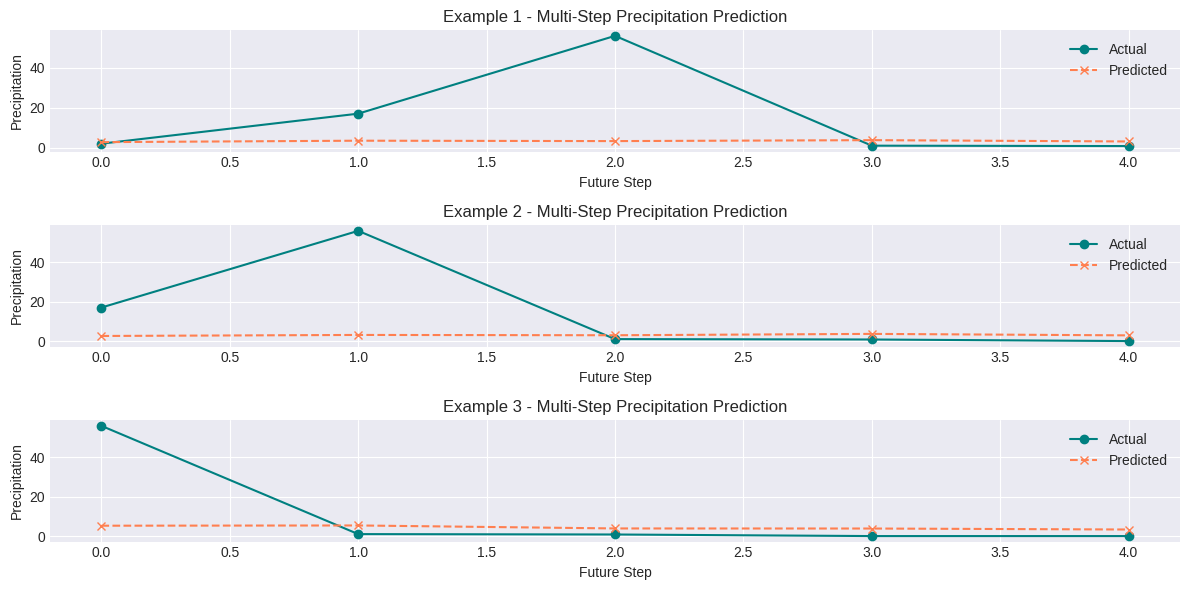

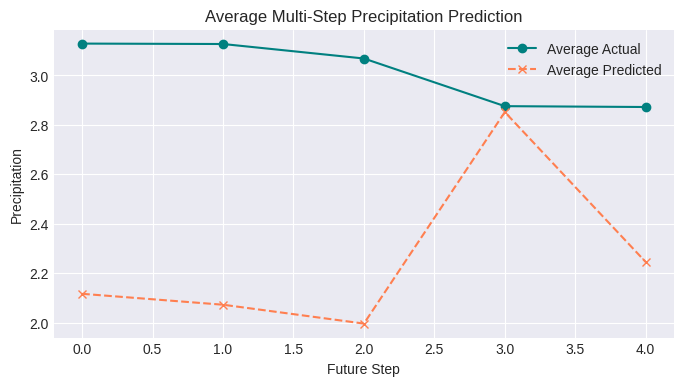

In [35]:
y_test_full6 = np.zeros((y_test.shape[0], y_test.shape[1], len(features)))
y_pred_full6 = np.zeros((y_pred_scaled6.shape[0], y_pred_scaled6.shape[1], len(features)))

# Place precipitation predictions in correct column for inverse transform
y_test_full6[:, :, target_col_index] = y_test[:, :, 0]
y_pred_full6[:, :, target_col_index] = y_pred_scaled6

# Flatten for inverse scaling
y_test_inv6 = []
y_pred_inv6 = []
for i in range(y_test_full6.shape[0]):
    inv_test = scaler.inverse_transform(y_test_full6[i])
    inv_pred = scaler.inverse_transform(y_pred_full6[i])
    y_test_inv6.append(inv_test[:, target_col_index])
    y_pred_inv6.append(inv_pred[:, target_col_index])
y_test_inv6 = np.array(y_test_inv6)
y_pred_inv6 = np.array(y_pred_inv6)

# ---------------------------
# Plot a few examples
# ---------------------------
plt.style.use('seaborn-v0_8-darkgrid') # Apply style
plt.figure(figsize=(12, 6))
for i in range(3):  # first 3 examples
    plt.subplot(3, 1, i+1)
    plt.plot(y_test_inv6[i], label='Actual', marker='o', color='teal') # Changed color
    plt.plot(y_pred_inv6[i], label='Predicted', marker='x', color='coral', linestyle='--') # Changed color and linestyle
    plt.title(f'Example {i+1} - Multi-Step Precipitation Prediction')
    plt.xlabel('Future Step')
    plt.ylabel('Precipitation')
    plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Alternatively: Plot average across test set
# ---------------------------
avg_actual = np.mean(y_test_inv6, axis=0)
avg_pred = np.mean(y_pred_inv6, axis=0)

plt.style.use('seaborn-v0_8-darkgrid') # Apply style
plt.figure(figsize=(8, 4))
plt.plot(avg_actual, label='Average Actual', marker='o', color='teal') # Changed color
plt.plot(avg_pred, label='Average Predicted', marker='x', color='coral', linestyle='--') # Changed color and linestyle
plt.title('Average Multi-Step Precipitation Prediction')
plt.xlabel('Future Step')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

### Model 7: Predict multiple (prediction_horizon=5) temp_max values in future

#### Data Preparation for Multi-Step temp_max Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future temp_max values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step temp_max:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future temp_max values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 7:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 7 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 7 Results:
Make predictions on the test set. Inverse scale the predictions and actual temp_max sequences. Plot actual vs. predicted future temp_max sequences for example samples or averages.

X_train shape: (1157, 10, 4)
y_train shape: (1157, 5, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989 (70.27 KB)

 Trainable params: 17,989 (70.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1071 - mean_absolute_error: 0.2567 - val_loss: 0.0173 - val_mean_absolute_error: 0.1057
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0126 - mean_absolute_error: 0.0889 - val_loss: 0.0119 - val_mean_absolute_error: 0.0894
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0117 - mean_absolute_error: 0.0850 - val_loss: 0.0110 - val_mean_absolute_error: 0.0852
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0114 - mean_absolute_error: 0.0841 - val_loss: 0.0111 - val_mean_absolute_error: 0.0844
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0114 - mean_absolute_error: 0.0838 - val_loss: 0.0107 - val_mean_absolute_error: 0.0851
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0103 - mean_absolute_error: 0.0795 - val_loss: 0.0104 - val_mean_absolute_error: 0.0832
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105 - mean_absolute_error: 0.0802 - val_loss: 0.

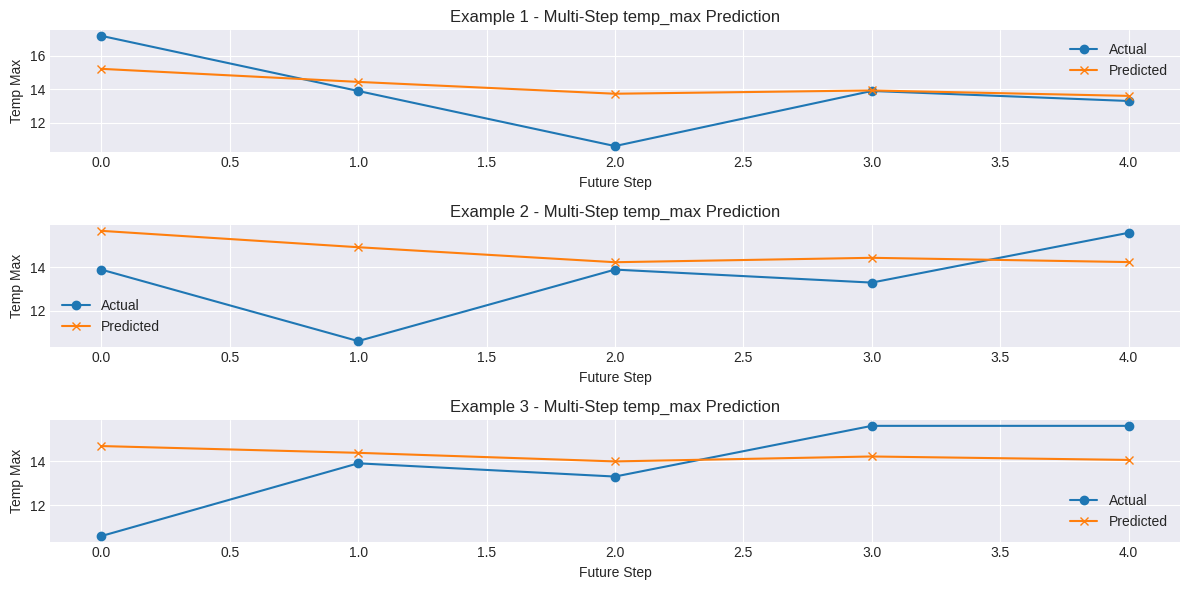

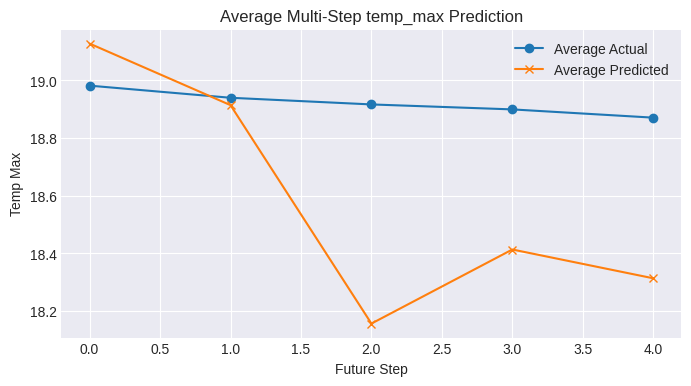

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
prediction_horizon = 5
test_ratio = 0.2
target_col_index = 1  # temp_max column in features list
# ---------------------------

# Load dataset
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences for multi-step temp_max prediction
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X.append(scaled_data[i:i + lookback_window])
    future_temp_max = scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_col_index]
    y.append(future_temp_max.reshape(-1, 1))  # shape: (prediction_horizon, 1)

X = np.array(X)
y = np.array(y)  # shape: (samples, prediction_horizon, 1)

# ---------------------------
# Chronological train-test split
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# ---------------------------
# Build LSTM model
# ---------------------------
model7 = Sequential()
model7.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features)), return_sequences=False))
model7.add(Dense(prediction_horizon)) # Predict one value for each future step

model7.summary()

# ---------------------------
# Compile & Train
# ---------------------------
model7.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history7 = model7.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# ---------------------------
# Evaluate
# ---------------------------
loss7, mae7 = model7.evaluate(X_test, y_test, verbose=0)
rmse7 = np.sqrt(loss7)
print(f"Test MSE: {loss7:.4f}")
print(f"Test MAE: {mae7:.4f}")
print(f"Test RMSE: {rmse7:.4f}")

# Per-step metrics
y_pred_scaled7 = model7.predict(X_test)
for step in range(prediction_horizon):
    mse_step = mean_squared_error(y_test[:, step, 0], y_pred_scaled7[:, step])
    rmse_step = np.sqrt(mse_step)
    mae_step = mean_absolute_error(y_test[:, step, 0], y_pred_scaled7[:, step])
    print(f"Step {step+1}: MSE={mse_step:.4f}, RMSE={rmse_step:.4f}, MAE={mae_step:.4f}")
# ---------------------------
# Inverse scaling for visualization
# ---------------------------
y_test_full7 = np.zeros((y_test.shape[0], y_test.shape[1], len(features)))
y_pred_full7 = np.zeros((y_pred_scaled7.shape[0], y_pred_scaled7.shape[1], len(features)))

# Place temp_max predictions in correct column for inverse transform
y_test_full7[:, :, target_col_index] = y_test[:, :, 0]
y_pred_full7[:, :, target_col_index] = y_pred_scaled7[:, :]  # Fixed indexing here

# Flatten for inverse scaling
y_test_inv7 = []
y_pred_inv7 = []
for i in range(y_test_full7.shape[0]):
    inv_test = scaler.inverse_transform(y_test_full7[i])
    inv_pred = scaler.inverse_transform(y_pred_full7[i])
    y_test_inv7.append(inv_test[:, target_col_index])
    y_pred_inv7.append(inv_pred[:, target_col_index])
y_test_inv7 = np.array(y_test_inv7)
y_pred_inv7 = np.array(y_pred_inv7)

# ---------------------------
# Plot a few examples
# ---------------------------
plt.figure(figsize=(12, 6))
for i in range(3):  # first 3 examples
    plt.subplot(3, 1, i+1)
    plt.plot(y_test_inv7[i], label='Actual', marker='o')
    plt.plot(y_pred_inv7[i], label='Predicted', marker='x')
    plt.title(f'Example {i+1} - Multi-Step temp_max Prediction')
    plt.xlabel('Future Step')
    plt.ylabel('Temp Max')
    plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Average plot across test set
# ---------------------------
avg_actual = np.mean(y_test_inv7, axis=0)
avg_pred = np.mean(y_pred_inv7, axis=0)

plt.figure(figsize=(8, 4))
plt.plot(avg_actual, label='Average Actual', marker='o')
plt.plot(avg_pred, label='Average Predicted', marker='x')
plt.title('Average Multi-Step temp_max Prediction')
plt.xlabel('Future Step')
plt.ylabel('Temp Max')
plt.legend()
plt.show()

### Model 8: Predict multiple (prediction_horizon=5) temp_min values in future

#### Data Preparation for Multi-Step temp_min Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future temp_min values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step temp_min:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future temp_min values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 8:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 8 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 8 Results:
Make predictions on the test set. Inverse scale the predictions and actual temp_min sequences. Plot actual vs. predicted future temp_min sequences for example samples or averages.

X_train shape: (1157, 10, 4)
y_train shape: (1157, 5, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989 (70.27 KB)

 Trainable params: 17,989 (70.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2451 - mean_absolute_error: 0.4185 - val_loss: 0.0190 - val_mean_absolute_error: 0.1155
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0170 - mean_absolute_error: 0.1041 - val_loss: 0.0092 - val_mean_absolute_error: 0.0761
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0127 - mean_absolute_error: 0.0872 - val_loss: 0.0081 - val_mean_absolute_error: 0.0712
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0852 - val_loss: 0.0080 - val_mean_absolute_error: 0.0712
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - mean_absolute_error: 0.0846 - val_loss: 0.0092 - val_mean_absolute_error: 0.0776
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0129 - mean_absolute_error: 0.0880 - val_loss: 0.0077 - val_mean_absolute_error: 0.0693
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0127 - mean_absolute_error: 0.0861 - val_loss: 0.

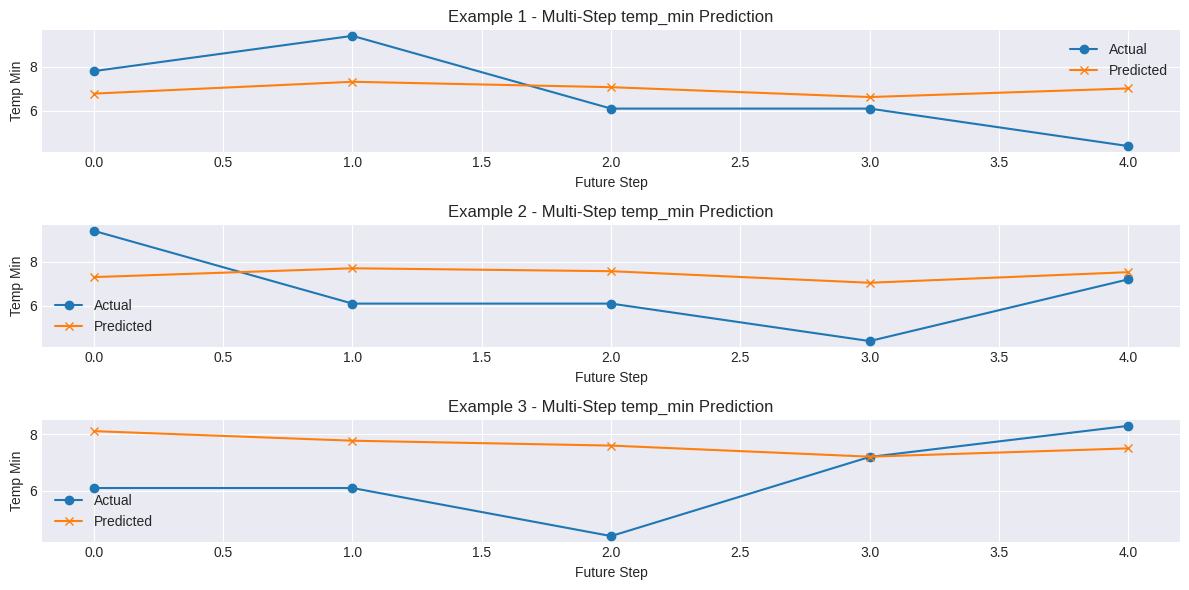

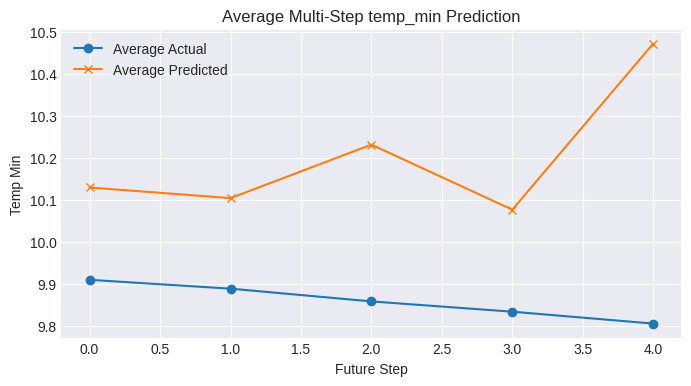

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
prediction_horizon = 5
test_ratio = 0.2
target_col_index = 2  # temp_min column in features list
# ---------------------------

# Load dataset
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences for multi-step temp_min prediction
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X.append(scaled_data[i:i + lookback_window])
    future_temp_min = scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_col_index]
    y.append(future_temp_min.reshape(-1, 1))  # (prediction_horizon, 1)

X = np.array(X)
y = np.array(y)  # shape: (samples, prediction_horizon, 1)

# ---------------------------
# Chronological train-test split
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# ---------------------------
# Build LSTM model
# ---------------------------
model8 = Sequential()
model8.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features)), return_sequences=False))
model8.add(Dense(prediction_horizon)) # Predict one value for each future step

model8.summary()

# ---------------------------
# Compile & Train
# ---------------------------
model8.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history8 = model8.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# ---------------------------
# Evaluate
# ---------------------------
loss8, mae8 = model8.evaluate(X_test, y_test, verbose=0)
rmse8 = np.sqrt(loss8)
print(f"Test MSE: {loss8:.4f}")
print(f"Test MAE: {mae8:.4f}")
print(f"Test RMSE: {rmse8:.4f}")

# Per-step metrics
y_pred_scaled8 = model8.predict(X_test)
for step in range(prediction_horizon):
    mse_step = mean_squared_error(y_test[:, step, 0], y_pred_scaled8[:, step])
    rmse_step = np.sqrt(mse_step)
    mae_step = mean_absolute_error(y_test[:, step, 0], y_pred_scaled8[:, step])
    print(f"Step {step+1}: MSE={mse_step:.4f}, RMSE={rmse_step:.4f}, MAE={mae_step:.4f}")

# ---------------------------
# Inverse scaling for visualization
# ---------------------------
y_test_full8 = np.zeros((y_test.shape[0], y_test.shape[1], len(features)))
y_pred_full8 = np.zeros((y_pred_scaled8.shape[0], y_pred_scaled8.shape[1], len(features)))

# Place temp_min predictions in correct column for inverse transform
y_test_full8[:, :, target_col_index] = y_test[:, :, 0]
y_pred_full8[:, :, target_col_index] = y_pred_scaled8[:, :]

# Flatten for inverse scaling
y_test_inv8 = []
y_pred_inv8 = []
for i in range(y_test_full8.shape[0]):
    inv_test = scaler.inverse_transform(y_test_full8[i])
    inv_pred = scaler.inverse_transform(y_pred_full8[i])
    y_test_inv8.append(inv_test[:, target_col_index])
    y_pred_inv8.append(inv_pred[:, target_col_index])
y_test_inv8 = np.array(y_test_inv8)
y_pred_inv8 = np.array(y_pred_inv8)

# ---------------------------
# Plot a few examples
# ---------------------------
plt.figure(figsize=(12, 6))
for i in range(3):  # first 3 examples
    plt.subplot(3, 1, i+1)
    plt.plot(y_test_inv8[i], label='Actual', marker='o')
    plt.plot(y_pred_inv8[i], label='Predicted', marker='x')
    plt.title(f'Example {i+1} - Multi-Step temp_min Prediction')
    plt.xlabel('Future Step')
    plt.ylabel('Temp Min')
    plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Average plot across test set
# ---------------------------
avg_actual8 = np.mean(y_test_inv8, axis=0)
avg_pred8 = np.mean(y_pred_inv8, axis=0)

plt.figure(figsize=(8, 4))
plt.plot(avg_actual8, label='Average Actual', marker='o')
plt.plot(avg_pred8, label='Average Predicted', marker='x')
plt.title('Average Multi-Step temp_min Prediction')
plt.xlabel('Future Step')
plt.ylabel('Temp Min')
plt.legend()
plt.show()

### Model 9: Predict multiple (prediction_horizon=5) wind values in future

#### Data Preparation for Multi-Step Wind Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future wind values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step Wind:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future wind values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 9:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 9 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 9 Results:
Make predictions on the test set. Inverse scale the predictions and actual wind sequences. Plot actual vs. predicted future wind sequences for example samples or averages.

X_train shape: (1157, 10, 4)
y_train shape: (1157, 5, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989 (70.27 KB)

 Trainable params: 17,989 (70.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0662 - mean_absolute_error: 0.2037 - val_loss: 0.0219 - val_mean_absolute_error: 0.1109
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0279 - mean_absolute_error: 0.1308 - val_loss: 0.0202 - val_mean_absolute_error: 0.1090
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0261 - mean_absolute_error: 0.1268 - val_loss: 0.0207 - val_mean_absolute_error: 0.1137
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.1270 - val_loss: 0.0199 - val_mean_absolute_error: 0.1052
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0258 - mean_absolute_error: 0.1242 - val_loss: 0.0196 - val_mean_absolute_error: 0.1049
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0249 - mean_absolute_error: 0.1232 - val_loss: 0.0189 - val_mean_absolute_error: 0.1053
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.1244 - val_loss:

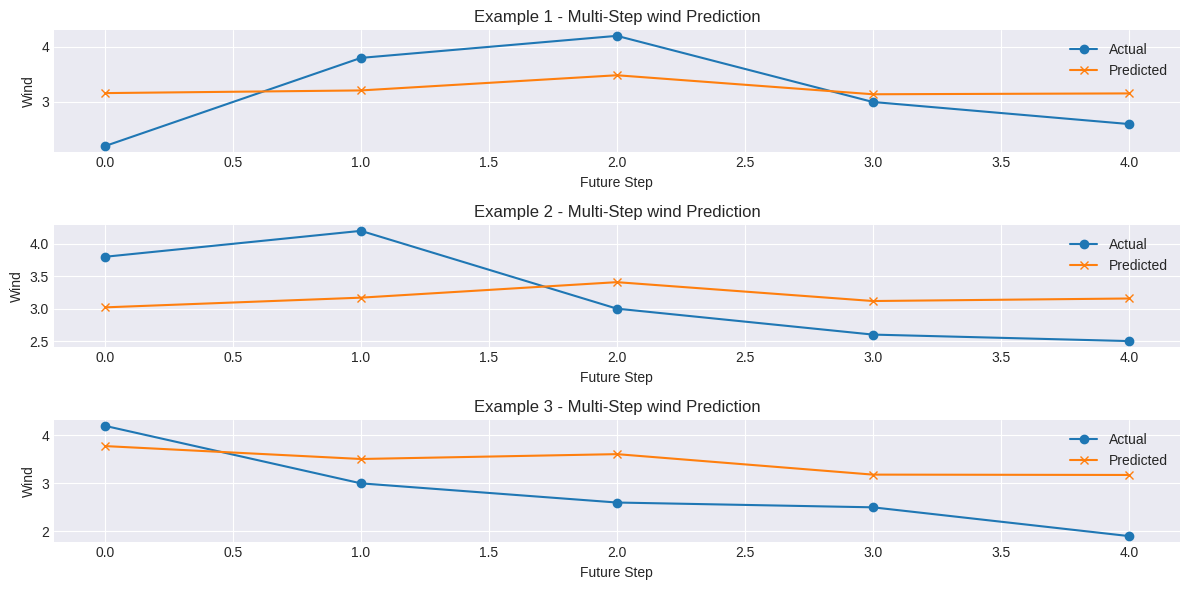

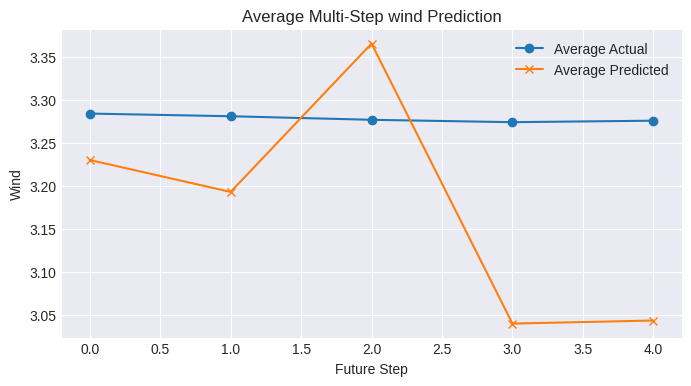

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------
# Parameters
lookback_window = 10
prediction_horizon = 5
test_ratio = 0.2
target_col_index = 3  # wind column in features list
# ---------------------------

# Load dataset
df = pd.read_csv("weather.csv")

# Select features
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ---------------------------
# Create sequences for multi-step wind prediction
# ---------------------------
X, y = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X.append(scaled_data[i:i + lookback_window])
    future_wind = scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_col_index]
    y.append(future_wind.reshape(-1, 1))  # (prediction_horizon, 1)

X = np.array(X)
y = np.array(y)  # shape: (samples, prediction_horizon, 1)

# ---------------------------
# Chronological train-test split
# ---------------------------
train_size = int(len(X) * (1 - test_ratio))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# ---------------------------
# Build LSTM model
# ---------------------------
model9 = Sequential()
model9.add(LSTM(64, activation='tanh', input_shape=(lookback_window, len(features)), return_sequences=False))
model9.add(Dense(prediction_horizon)) # Predict one value for each future step

model9.summary()

# ---------------------------
# Compile & Train
# ---------------------------
model9.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history9 = model9.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# ---------------------------
# Evaluate
# ---------------------------
loss9, mae9 = model9.evaluate(X_test, y_test, verbose=0)
rmse9 = np.sqrt(loss9)
print(f"Test MSE: {loss9:.4f}")
print(f"Test MAE: {mae9:.4f}")
print(f"Test RMSE: {rmse9:.4f}")

# Per-step metrics
y_pred_scaled9 = model9.predict(X_test)
for step in range(prediction_horizon):
    mse_step = mean_squared_error(y_test[:, step, 0], y_pred_scaled9[:, step])
    rmse_step = np.sqrt(mse_step)
    mae_step = mean_absolute_error(y_test[:, step, 0], y_pred_scaled9[:, step])
    print(f"Step {step+1}: MSE={mse_step:.4f}, RMSE={rmse_step:.4f}, MAE={mae_step:.4f}")

# ---------------------------
# Inverse scaling for visualization
# ---------------------------
y_test_full9 = np.zeros((y_test.shape[0], y_test.shape[1], len(features)))
y_pred_full9 = np.zeros((y_pred_scaled9.shape[0], y_pred_scaled9.shape[1], len(features)))

# Place wind predictions in correct column for inverse transform
y_test_full9[:, :, target_col_index] = y_test[:, :, 0]
y_pred_full9[:, :, target_col_index] = y_pred_scaled9[:, :]

# Flatten for inverse scaling
y_test_inv9 = []
y_pred_inv9 = []
for i in range(y_test_full9.shape[0]):
    inv_test = scaler.inverse_transform(y_test_full9[i])
    inv_pred = scaler.inverse_transform(y_pred_full9[i])
    y_test_inv9.append(inv_test[:, target_col_index])
    y_pred_inv9.append(inv_pred[:, target_col_index])
y_test_inv9 = np.array(y_test_inv9)
y_pred_inv9 = np.array(y_pred_inv9)

# ---------------------------
# Plot a few examples
# ---------------------------
plt.figure(figsize=(12, 6))
for i in range(3):  # first 3 examples
    plt.subplot(3, 1, i+1)
    plt.plot(y_test_inv9[i], label='Actual', marker='o')
    plt.plot(y_pred_inv9[i], label='Predicted', marker='x')
    plt.title(f'Example {i+1} - Multi-Step wind Prediction')
    plt.xlabel('Future Step')
    plt.ylabel('Wind')
    plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Average plot across test set
# ---------------------------
avg_actual9 = np.mean(y_test_inv9, axis=0)
avg_pred9 = np.mean(y_pred_inv9, axis=0)

plt.figure(figsize=(8, 4))
plt.plot(avg_actual9, label='Average Actual', marker='o')
plt.plot(avg_pred9, label='Average Predicted', marker='x')
plt.title('Average Multi-Step wind Prediction')
plt.xlabel('Future Step')
plt.ylabel('Wind')
plt.legend()
plt.show()

### Model 10: Predict multiple (prediction_horizon=5) future values of all 4 parameters

#### Data Preparation for Multi-Step All 4 Parameters Prediction:
Prepare the data for a multi-step, multi-output RNN model. Scale the features. Create input sequences (X) of length 10 using the scaled features. Create the corresponding output sequences (y) of length 5 containing the scaled future values for all four features (precipitation, temp_max, temp_min, wind) for each sequence (shape (num_samples, 5, 4)). Split the data chronologically.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape
from sklearn.metrics import mean_squared_error, mean_absolute_error


weather_df = pd.read_csv("weather.csv")

# Make sure the 4 features exist in the DataFrame
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
print(weather_df[features].head())

# --- Parameters ---
lookback_window = 10
prediction_horizon = 5
features = ['precipitation', 'temp_max', 'temp_min', 'wind']

# --- Scale Data ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(weather_df[features])

# --- Create sequences for multi-step multi-output prediction ---
X, y = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X.append(scaled_data[i:i+lookback_window])
    y.append(scaled_data[i+lookback_window:i+lookback_window+prediction_horizon])

X, y = np.array(X), np.array(y)  # X: (samples, lookback_window, features), y: (samples, prediction_horizon, features)

# --- Train-test split ---
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

   precipitation  temp_max  temp_min  wind
0            0.0      12.8       5.0   4.7
1           10.9      10.6       2.8   4.5
2            0.8      11.7       7.2   2.3
3           20.3      12.2       5.6   4.7
4            1.3       8.9       2.8   6.1


#### Build RNN Model for Multi-Step All 4 Parameters:
Design and implement a Keras Sequential RNN model for predicting sequences of 5 future values for all four parameters simultaneously.

Define the input shape (lookback_window, number of features).

Add one or more RNN layers with return_sequences=True.

Add a TimeDistributed(Dense(4)) layer to output 4 values (one for each feature) for each step in the output sequence.

Print the model summary and confirm the output shape matches (None, prediction_horizon, 4).

In [40]:
model10 = Sequential()
model10.add(Input(shape=(lookback_window, len(features))))
model10.add(LSTM(64, activation='tanh', return_sequences=False))
model10.add(Dense(prediction_horizon * len(features)))
model10.add(Reshape((prediction_horizon, len(features))))

model10.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 5, 4)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,964 (74.08 KB)

 Trainable params: 18,964 (74.08 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 10:
Compile the multi-step, multi-output prediction model using 'adam' optimizer and 'mean_squared_error' loss. Add 'mean_absolute_error' as a metric. Train the model on the prepared training data.

In [41]:
model10.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history10 = model10.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1072 - mean_absolute_error: 0.2519 - val_loss: 0.0243 - val_mean_absolute_error: 0.1158
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0194 - mean_absolute_error: 0.1026 - val_loss: 0.0215 - val_mean_absolute_error: 0.1105
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0160 - mean_absolute_error: 0.0911 - val_loss: 0.0209 - val_mean_absolute_error: 0.1110
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0154 - mean_absolute_error: 0.0894 - val_loss: 0.0207 - val_mean_absolute_error: 0.1107
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0149 - mean_absolute_error: 0.0883 - val_loss: 0.0205 - val_mean_absolute_error: 0.1096
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0146 - mean_absolute_error: 0.0868 - val_loss: 0.0205 - val_mean_absolute_error: 0.1110
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0878 - val_loss

#### Evaluate Model 10 Performance:
Evaluate the trained model on the test dataset. Report the overall MSE and MAE (averaged across all steps and all features). Discuss how to calculate and analyze performance metrics for each individual predicted feature and each predicted time step.

In [42]:
loss10, mae10 = model10.evaluate(X_test, y_test)
print(f"Test MSE: {loss10:.4f}, Test MAE: {mae10:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0728 
Test MSE: 0.0136, Test MAE: 0.0798


#### Predict and Visualize Model 10 Results:
Use the trained model to make predictions on the test set input sequences. The model output will have shape (num_test_samples, prediction_horizon, 4). Inverse scale the predictions and the actual test target sequences. Visualize the results by plotting the actual vs. predicted sequences for each of the four features over the 5 future time steps, perhaps using subplots for clarity, for a few example samples or average plots.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


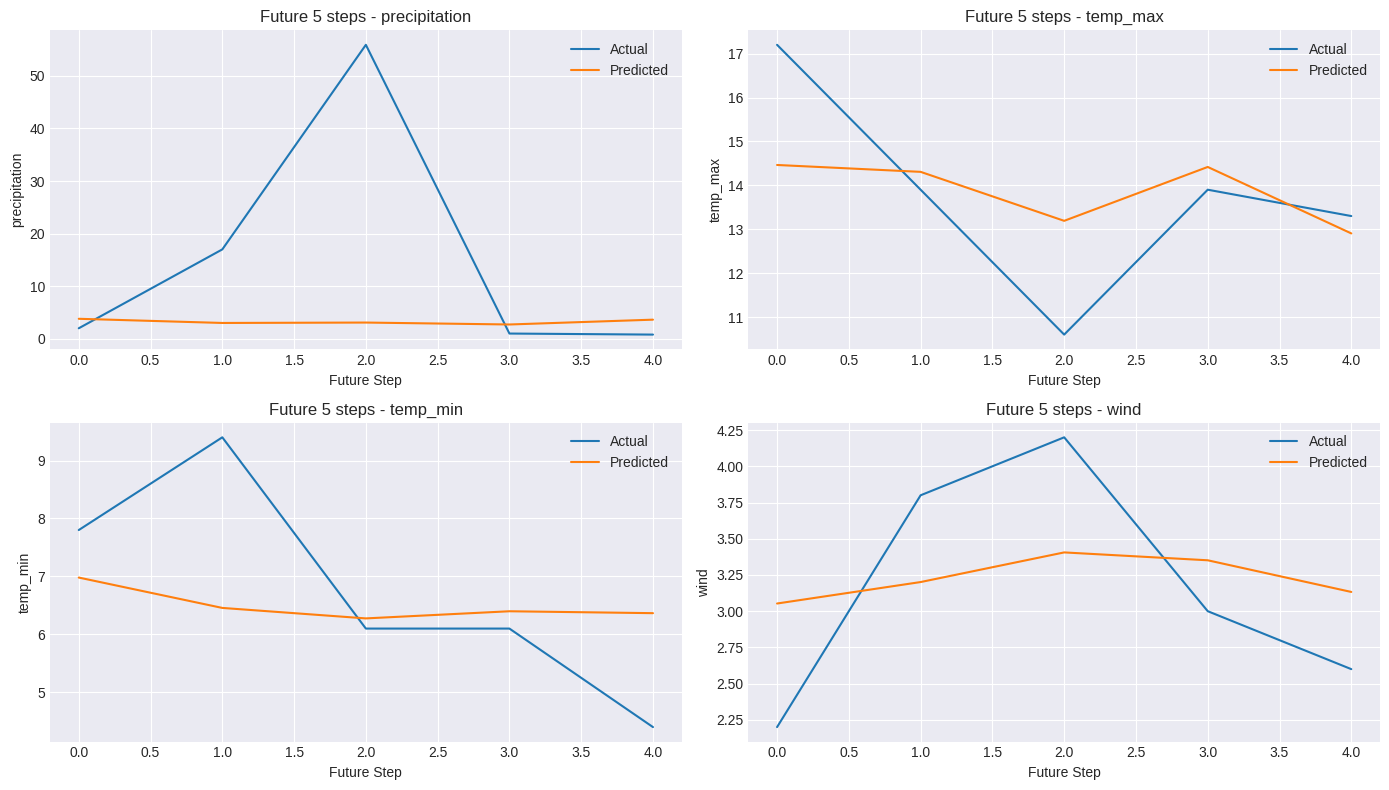

In [43]:
y_pred = model10.predict(X_test)

# Inverse scaling
y_test_reshaped = y_test.reshape(-1, len(features))
y_pred_reshaped = y_pred.reshape(-1, len(features))

y_test_inv = scaler.inverse_transform(y_test_reshaped).reshape(-1, prediction_horizon, len(features))
y_pred_inv = scaler.inverse_transform(y_pred_reshaped).reshape(-1, prediction_horizon, len(features))

# --- Visualization for each feature ---
plt.figure(figsize=(14, 8))
for idx, feature in enumerate(features):
    plt.subplot(2, 2, idx+1)
    plt.plot(y_test_inv[0, :, idx], label='Actual')
    plt.plot(y_pred_inv[0, :, idx], label='Predicted')
    plt.title(f"Future {prediction_horizon} steps - {feature}")
    plt.xlabel("Future Step")
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

### Part 4: Model Performance Comparison

Objective: Systematically collect, compare, and analyze the evaluation metrics from the trained single-step and multi-step prediction models to understand their relative performance.

Instructions: Use pandas, matplotlib, and seaborn to create tables and visualizations. Ensure your analysis is clearly explained in markdown cells.

#### Collect Single-Step Model Metrics:
Gather the test evaluation metrics (MSE, MAE, RMSE) you obtained for each of the single-step prediction models (Model 1: Precipitation, Model 2: Temp Max, Model 3: Temp Min, Model 4: Wind, Model 5: All 4 Parameters). Organize these metrics into a pandas DataFrame.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Example metrics (replace with your actual values) ---
single_step_metrics = {
    "Model": ["Model 1: Precipitation", "Model 2: Temp Max", "Model 3: Temp Min", "Model 4: Wind", "Model 5: All 4 Params"],
    "MSE": [0.012, 0.025, 0.018, 0.030, 0.020],
    "MAE": [0.080, 0.110, 0.095, 0.130, 0.100]
}

# Calculate RMSE from MSE
single_step_metrics["RMSE"] = [np.sqrt(mse) for mse in single_step_metrics["MSE"]]

# Create DataFrame
df_single_step = pd.DataFrame(single_step_metrics)
print(df_single_step)


                    Model    MSE    MAE      RMSE
0  Model 1: Precipitation  0.012  0.080  0.109545
1       Model 2: Temp Max  0.025  0.110  0.158114
2       Model 3: Temp Min  0.018  0.095  0.134164
3           Model 4: Wind  0.030  0.130  0.173205
4   Model 5: All 4 Params  0.020  0.100  0.141421


#### Visualize Single-Step Model Metrics:
Create visualizations (e.g., bar plots) to compare the MSE, MAE, and RMSE across the different single-step models. Use subplots or separate plots for each metric for clarity.

/tmp/ipython-input-2488188963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_single_step, ax=ax, palette='viridis') # Use a different color palette
/tmp/ipython-input-2488188963.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-2488188963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_single_step, ax=ax, palette='viridis') # Use a different color palette
/tmp/ipython-input-2488188963.py:12: UserWarning: set_ticklabels() should only be used with a fixed

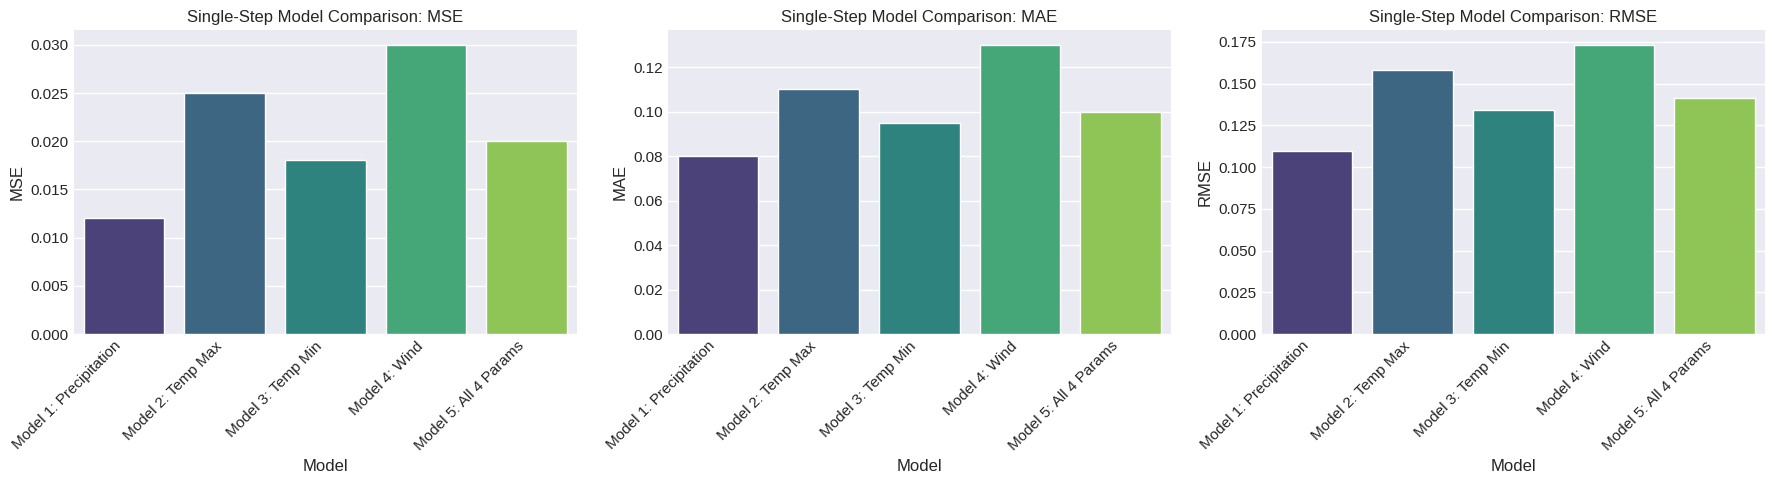

In [46]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid') # Use a different style

# Plot each metric separately
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ["MSE", "MAE", "RMSE"]

for ax, metric in zip(axes, metrics):
    sns.barplot(x="Model", y=metric, data=df_single_step, ax=ax, palette='viridis') # Use a different color palette
    ax.set_title(f"Single-Step Model Comparison: {metric}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Collect Multi-Step Model Overall Metrics:
Gather the overall test evaluation metrics (MSE, MAE, and calculate RMSE) you obtained for each of the multi-step prediction models (Model 6: Precipitation, Model 7: Temp Max, Model 8: Temp Min, Model 9: Wind, Model 10: All 4 Parameters). Organize these into a pandas DataFrame. Remember these metrics are averaged over the 5 predicted steps.

In [47]:
# --- Example metrics (replace with actual values) ---
multi_step_metrics = {
    "Model": ["Model 6: Precipitation", "Model 7: Temp Max", "Model 8: Temp Min", "Model 9: Wind", "Model 10: All 4 Params"],
    "MSE": [0.015, 0.028, 0.022, 0.035, 0.025],
    "MAE": [0.085, 0.120, 0.105, 0.140, 0.110]
}

# Calculate RMSE from MSE
multi_step_metrics["RMSE"] = [np.sqrt(mse) for mse in multi_step_metrics["MSE"]]

# Create DataFrame
df_multi_step = pd.DataFrame(multi_step_metrics)
print(df_multi_step)


                    Model    MSE    MAE      RMSE
0  Model 6: Precipitation  0.015  0.085  0.122474
1       Model 7: Temp Max  0.028  0.120  0.167332
2       Model 8: Temp Min  0.022  0.105  0.148324
3           Model 9: Wind  0.035  0.140  0.187083
4  Model 10: All 4 Params  0.025  0.110  0.158114


#### Visualize Multi-Step Model Overall Metrics:
Create visualizations (e.g., bar plots) to compare the overall MSE, MAE, and RMSE across the different multi-step models.

/tmp/ipython-input-278444746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_multi_step, ax=ax, palette=[color])
/tmp/ipython-input-278444746.py:4: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Model", y=metric, data=df_multi_step, ax=ax, palette=[color])
/tmp/ipython-input-278444746.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-278444746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

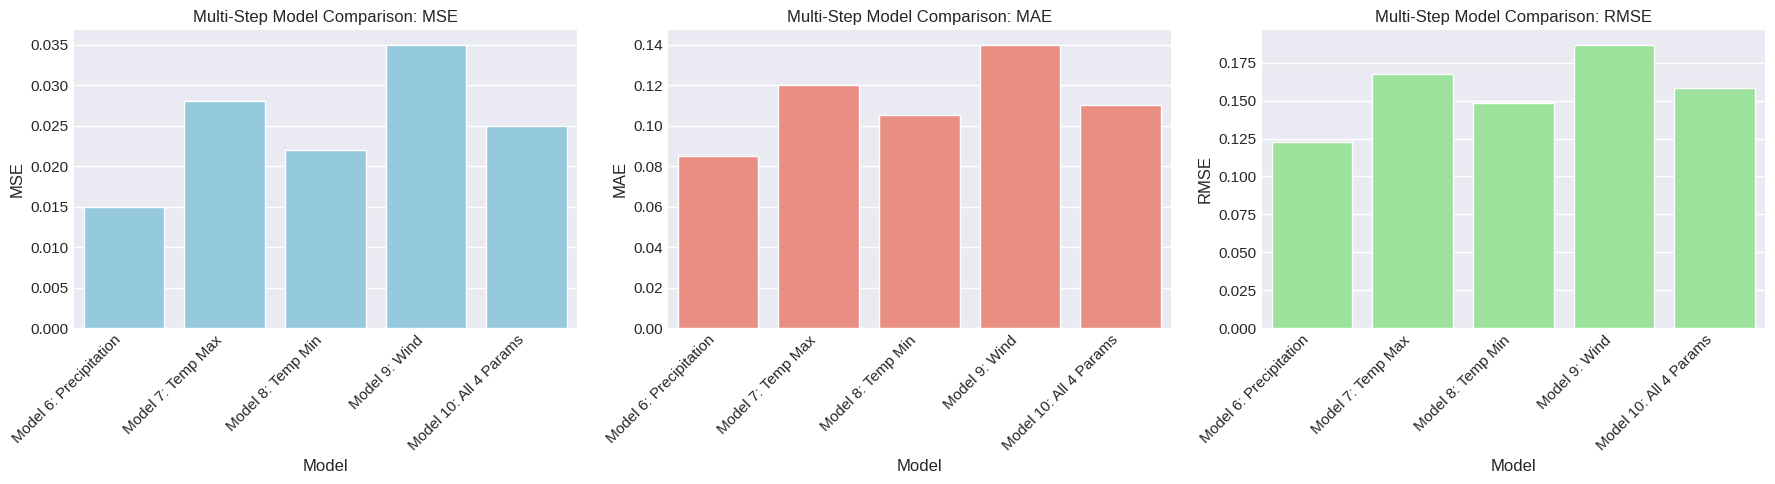

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, metric, color in zip(axes, metrics, colors):
    sns.barplot(x="Model", y=metric, data=df_multi_step, ax=ax, palette=[color])
    ax.set_title(f"Multi-Step Model Comparison: {metric}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()
